# Hot Dog: Calories and Sodium

## Description

Results of a laboratory analysis of calories and sodium content of major hot dog brands. 
Researchers for Consumer Reports analyzed three types of hot dog: beef, poultry, and meat 
(mostly pork and beef, but up to 15% poultry meat).

In [2]:
#data processing
import pandas as pd
import numpy as np

#visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#stats pacdkages
import statsmodels.api as sm
from scipy.stats import linregress 


In [3]:
#collect the data and store in a pandas DataFrame

url = 'http://wiki.stat.ucla.edu/socr/index.php/SOCR_012708_ID_Data_HotDogs'
df = pd.read_html(url)[1]

df = df.reindex(df.index.drop(0))
df[[1,2]] = df[[1,2]].astype(float)
df[0] = df[0].astype(str)
df.columns = ['type','calories','sodium']

In [4]:
beef,meat,poultry = df.loc[0:20], df.loc[21:37], df.loc[38:]
# the DataFrame split according to type

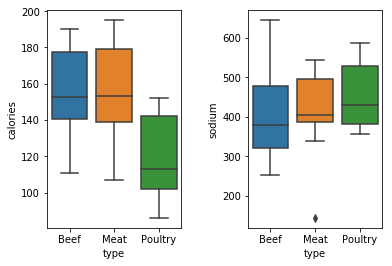

In [5]:
# box plots 
fig, ax = plt.subplots(1,2)
fig.subplots_adjust(hspace=0.2, wspace=0.5)

sns.boxplot(data=df,x='type',y='calories', ax=ax[0])
sns.boxplot(data=df,x='type',y='sodium', ax=ax[1])
plt.show()

Comparing the poultry and beef hot dogs, we see that poultry hot dogs have lower calories: 160 and less where as over half of the beef samples have calories over 150.

We also notice the sodium content is greatly varied for beef compared to poultry and meat hot dogs.

The indication of the calorie spread suggests beef and poultry sausages can be classified by a function. However, the box plot shows no distinct feature of meat hot dogs that can differentiates them from beef or poultry.


C:\Users\Nehe\Anaconda2\envs\py36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


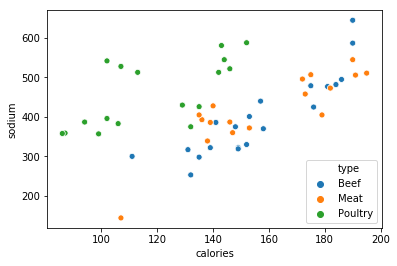

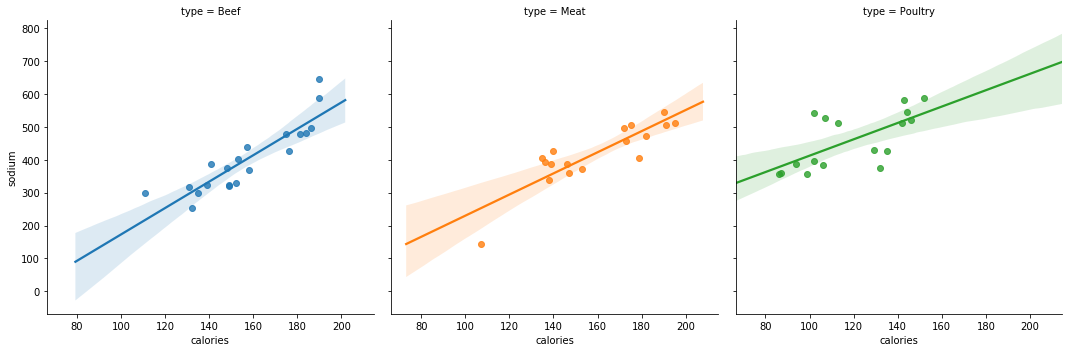

In [6]:
sns.scatterplot(data=df,x='calories',y='sodium', hue='type')
sns.lmplot(data=df,x='calories',y='sodium', hue='type', col='type') 
plt.show()

From the plot there seems to be linear relationship between calories and sodium for the hot dogs. 

To verify we will test each type with a simple linear regresion model.


## Simple Linear Regression Methods

##### Method: sklearn.linear_model.LinearRegression()
* Most popular method for data scientists
* requires numpy array for variables

In [7]:
# transform the 3 data frames to numpy arrays rows corresponding to type, sodium, calories respectively.
np_beef = beef.T.values
np_poultry = poultry.T.values
np_meat = meat.T.values

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

for type in np_beef, np_poultry, np_meat:
    fit = model.fit(type[1].reshape(-1,1), type[2].reshape(-1,1)), 
    score = model.score(type[1].reshape(-1,1), type[2].reshape(-1,1))
    print('Type: ', type[0][0], '\n'
          'Score (R Squared): ' ,score, '\n'
          'Coefficient: ', model.coef_ , '\n'
          'Intercept: ', model.intercept_, '\n'
    )

Type:  Beef 
Score (R Squared):  0.7869228258148608 
Coefficient:  [[4.01326927]] 
Intercept:  [-228.33128519] 

Type:  Poultry 
Score (R Squared):  0.438061431742501 
Coefficient:  [[2.48701655]] 
Intercept:  [163.63021037] 

Type:  Meat 
Score (R Squared):  0.745464834395291 
Coefficient:  [[3.21169366]] 
Intercept:  [-91.18526515] 




##### Method: Stats.linregress()
Linear regression using stats.linregress

In [9]:
for type in beef, poultry, meat:
    (a_s,b_s,r,tt,stderr) = linregress(type['sodium'],type['calories']) 
    print('a=%.2f, b=%.2f, std error= %.3f, r^2 coefficient= %.5f' % (a_s,b_s,stderr,r), '\n')

a=0.20, b=78.19, std error= 0.024, r^2 coefficient= 0.88709 

a=0.18, b=37.92, std error= 0.052, r^2 coefficient= 0.66186 

a=0.23, b=61.56, std error= 0.035, r^2 coefficient= 0.86340 



##### Method: Statsmodels.OLS()
Linear regression using statsmodels.OLS (Ordinary Least Squares)

In [10]:
for type in beef, poultry, meat:
    X = sm.add_constant(type['sodium'])
    y = type['calories']
    model = sm.OLS(y, X).fit()
    print(model.summary(),'\n')

## Not the best Linear regression model for small datasets

                            OLS Regression Results                            
Dep. Variable:               calories   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     66.48
Date:                Thu, 20 Sep 2018   Prob (F-statistic):           1.87e-07
Time:                        11:33:54   Log-Likelihood:                -74.801
No. Observations:                  20   AIC:                             153.6
Df Residuals:                      18   BIC:                             155.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         78.1924      9.942      7.865      0.0

C:\Users\Nehe\Anaconda2\envs\py36\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))
C:\Users\Nehe\Anaconda2\envs\py36\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


## Classification Methods

#### Linear Classification

To classify beef and poultry hot dogs a linear classification model seems appropriate, the tricky part is to classify meat hot dogs as they are a composite of poultry, beef and pork (We do know that up to 15% is poultry).

 #### Support Vector Machine

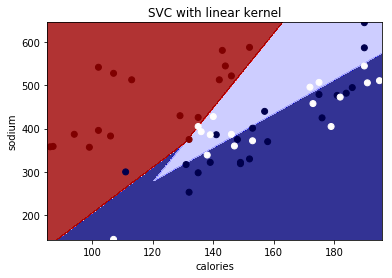

In [53]:
from sklearn import svm

X = df.values[:,[1,2]] # calories, sodium
type = {'Beef':0,'Meat':1,'Poultry':2}
y = [type[item] for item in df['type']]
svc = svm.SVC(kernel='linear', C=1.0).fit(X,y)

x_min, x_max = X[:,0].min() -1, X[:,0].max() +1
y_min, y_max = X[:,1].min() -1, X[:,1].max() +1

h = 0.2 
xx, yy = np.meshgrid(np.arange(x_min,x_max, h),
                     np.arange(y_min,y_max, h),)

Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.seismic, alpha=0.8)

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.seismic, )
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('SVC with linear kernel')
plt.xlabel('calories')
plt.ylabel('sodium')
plt.show()



As predicted the SVC works well classifying poultry/beef but not the meat type.